In [1]:
from collections import defaultdict
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gzip
%matplotlib inline

In [2]:
CONGOV_LDA = 'tw_topicos_lda_15.txt.gz'
CONGOV_LSI = 'tw_topicos_lsi_15.txt.gz'

PROGOV_LDA = 'tw_topicos_lda_13.txt.gz'
PROGOV_LSI = 'tw_topicos_lsi_13.txt.gz'

# words extracted from top-3 of previous table
words = ['globogolpista','dia13diadeluta','domingoeunaovouporque','globoquergolpe',
         'foradilma','dilma','vemprarua','familiamarinhonohsbc','tchau']
progov = ['globogolpista','dia13diadeluta','domingoeunaovouporque','globoquergolpe','familiamarinhonohsbc']
congov = ['foradilma', 'dilma', 'tchau']
users = ['Larissa Alves', '#ForaDilma', 'eduardo', 'Claudia Abreu']

In [9]:
def TimeSeries(filename, words, progov, congov):
    Freq = dict([(w,np.zeros(24)) for w in words])
    FreqSent = {'pro':np.zeros(24), 'con':np.zeros(24)}
    f = gzip.open(filename)
    for l in f:
        if l.strip()!='':
            tweet = l.split(' $&% ')[0].split(' >> ')[-1].strip()
            try:
                hour = int(l.split(' $&% ')[0].split(' >> ')[1].split(' ')[1].split(':')[0]) 
            except:
                print l
            for w in words:
                if w in tweet.split():
                    Freq[w][hour] += 1
                    if w in progov:
                        FreqSent['pro'][hour] += 1
                    elif w in congov:
                        FreqSent['con'][hour] += 1
    f.close()
    return Freq, FreqSent

def TimeSeriesUsers(filename, users):
    Freq = dict([(w,np.zeros(24)) for w in users])
    f = gzip.open(filename)
    for l in f:
        if len(l.strip())>0 and len(l.split(' >> '))==3:
            user = l.split(' >> ')[0].strip()            
            try:
                hour = int(l.split(' $&% ')[0].split(' >> ')[1].split(' ')[1].split(':')[0]) 
            except:
                print l
            if user in users:
                Freq[user][hour] += 1
    f.close()
    return Freq

In [26]:
def PlotT(Freq, Name, Fname):
    sns.set(style="white", context="talk")
    
    hour = pd.Series(range(24), name="hour")
    topics = pd.Series([t for t in Freq.keys()])
    data = np.dstack([v for v in Freq.values()])
    plt.figure()
    plt.rcParams.update({'legend.fontsize':18})
    sns.tsplot(data, time=hour, condition=topics, value="Frequency", color="Paired")
    plt.title(Name)    
    plt.savefig(Fname)

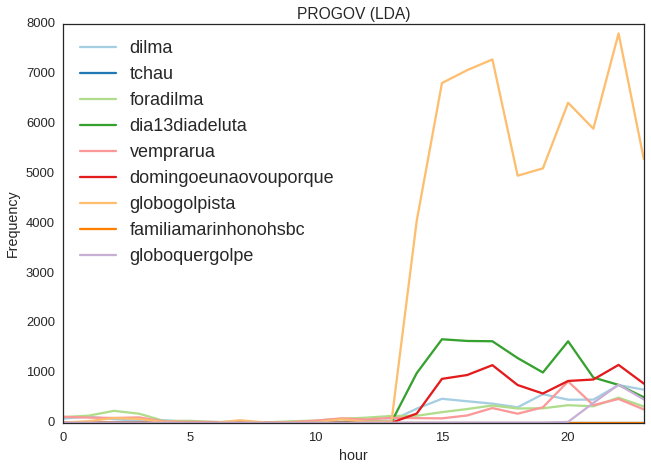

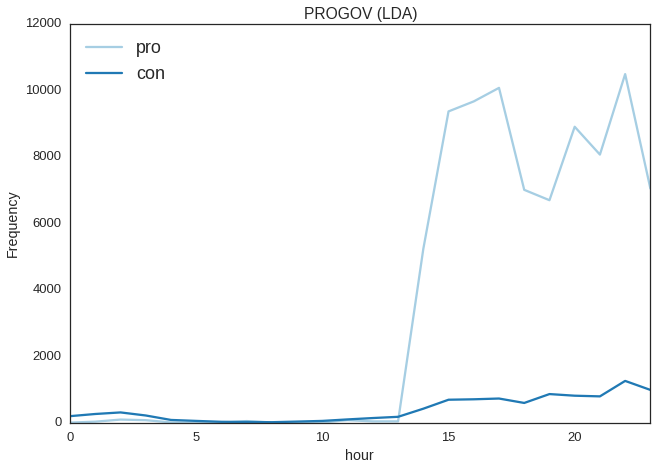

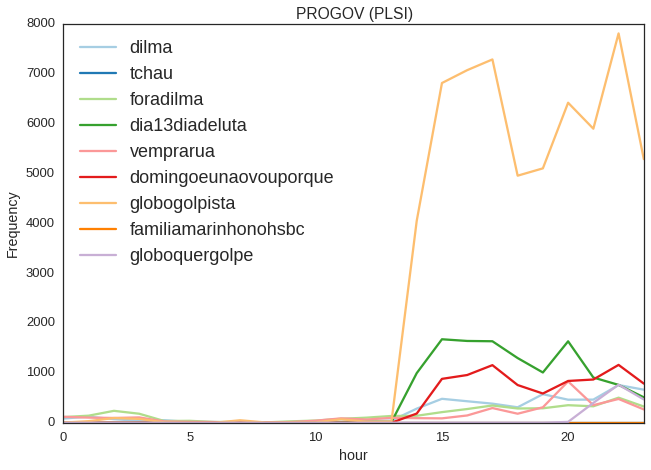

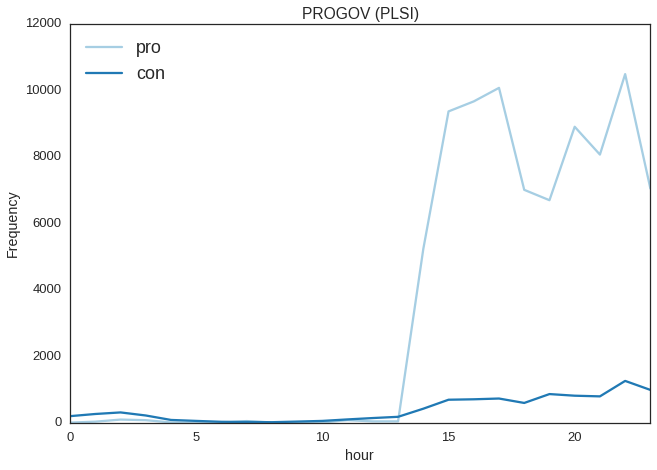

In [27]:
Freq, FreqW = TimeSeries(PROGOV_LDA, words, progov, congov)
PlotT(Freq, 'PROGOV (LDA)', 'PROGOV_TS_LDA_topics.eps')
PlotT(FreqW, 'PROGOV (LDA)', 'PROGOV_TS_LDA_sent.eps')

Freq, FreqW = TimeSeries(PROGOV_LSI, words, progov, congov)
PlotT(Freq, 'PROGOV (PLSI)', 'PROGOV_TS_PLSI_topics.eps')
PlotT(FreqW, 'PROGOV (PLSI)', 'PROGOV_TS_PLSI_sent.eps')

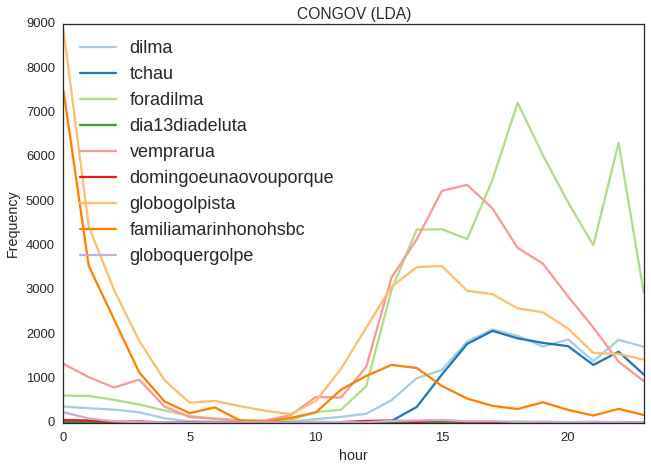

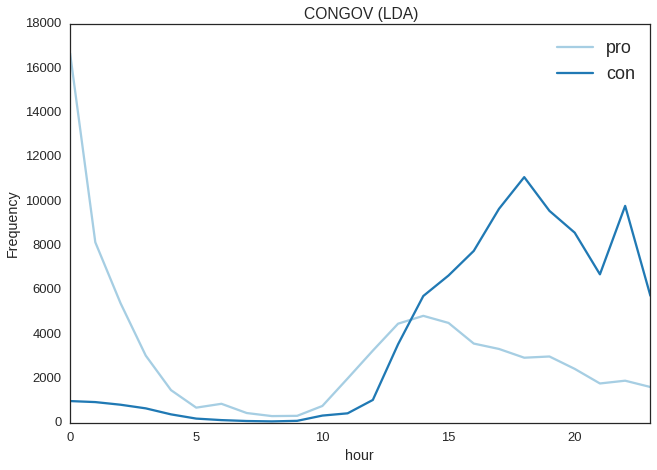

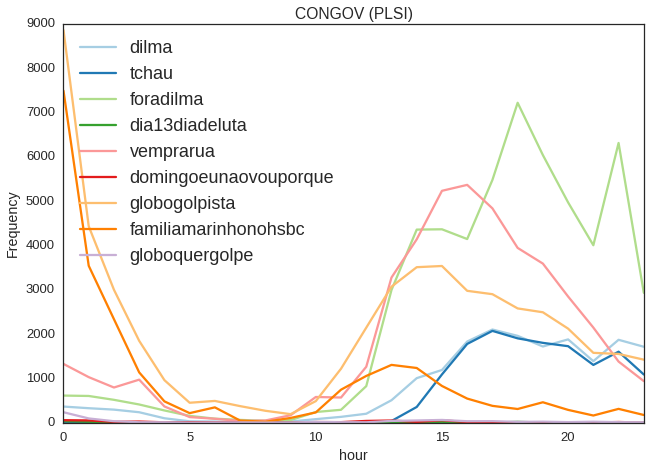

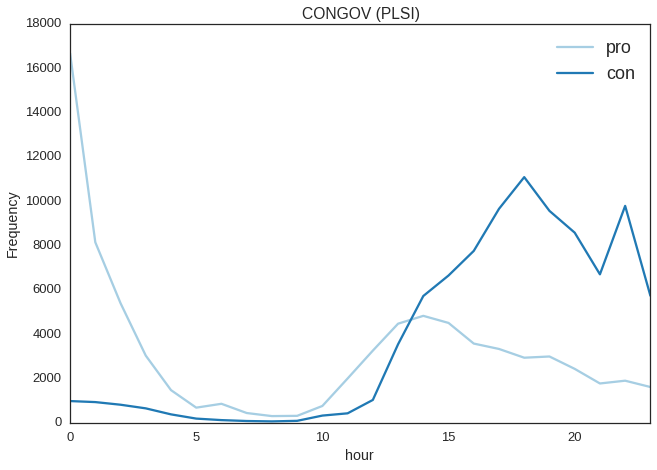

In [28]:
Freq, FreqW = TimeSeries(CONGOV_LDA, words, progov, congov)
PlotT(Freq, 'CONGOV (LDA)', 'CONGOV_TS_LDA_topics.eps')
PlotT(FreqW, 'CONGOV (LDA)', 'CONGOV_TS_LDA_sent.eps')

Freq, FreqW = TimeSeries(CONGOV_LSI, words, progov, congov)
PlotT(Freq, 'CONGOV (PLSI)', 'CONGOV_TS_PLSI_topics.eps')
PlotT(FreqW, 'CONGOV (PLSI)', 'CONGOV_TS_PLSI_sent.eps')

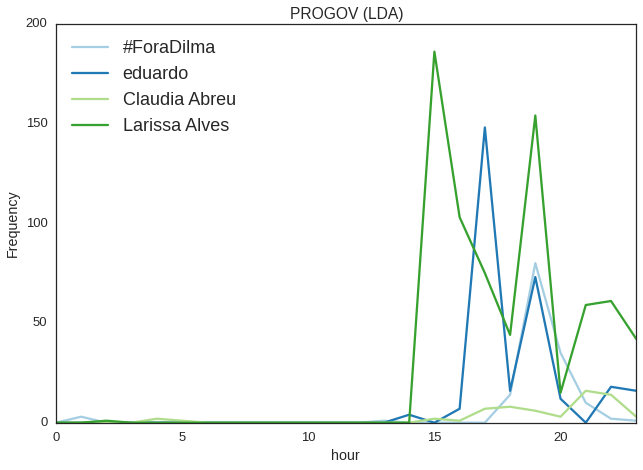

In [29]:
Freq = TimeSeriesUsers(PROGOV_LDA, users)
PlotT(Freq, 'PROGOV (LDA)', 'PROGOV_TS_LDA_users.eps')

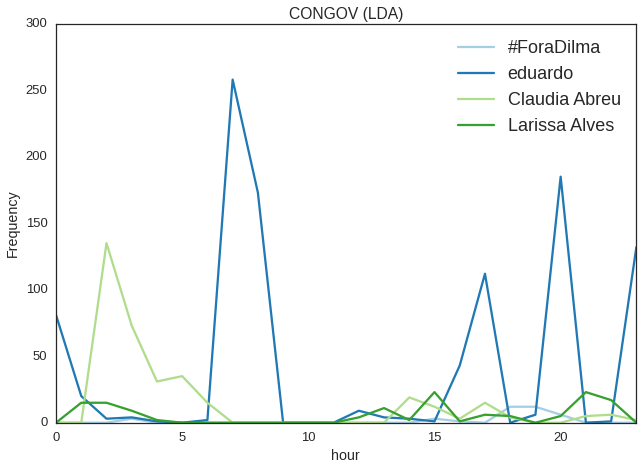

In [30]:
Freq = TimeSeriesUsers(CONGOV_LDA, users)
PlotT(Freq, 'CONGOV (LDA)', 'CONGOV_TS_LDA_users.eps')

In [20]:
f = gzip.open(CONGOV_LDA)
for l in f:
    if len(l.strip())>0 and len(l.split(' >> '))==3:
        user = l.split(' >> ')[0].strip()            
        try:
            hour = int(l.split(' $&% ')[0].split(' >> ')[1].split(' ')[1].split(':')[0]) 
        except:
            print l
        if user == 'eduardo' and hour == 21:
            print l
            break
f.close()